# 9.2 Zadanie na zaliczenie modułu

#### Import niezbednych bibliotek

In [3]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Wczytanie danych z pliku

In [5]:
hr_data = pd.read_csv('HRDataset.csv') #,sep=';'
hr_data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


#### Czysczenie danych 

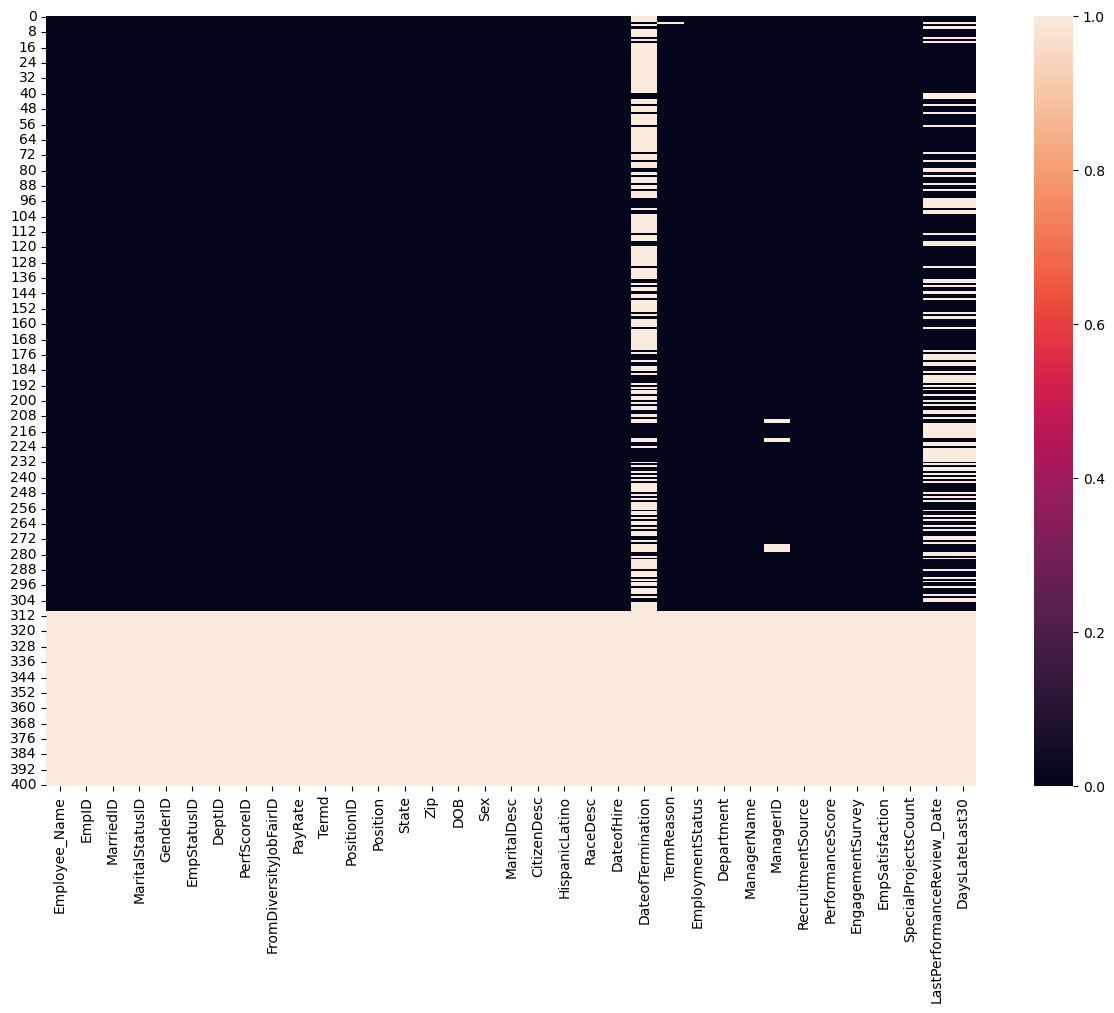

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(hr_data.isnull())
plt.show()

In [8]:
hr_data.drop(['LastPerformanceReview_Date','DaysLateLast30'],axis=1,inplace=True)

In [9]:
hr_data.dropna(thresh=2,inplace=True)

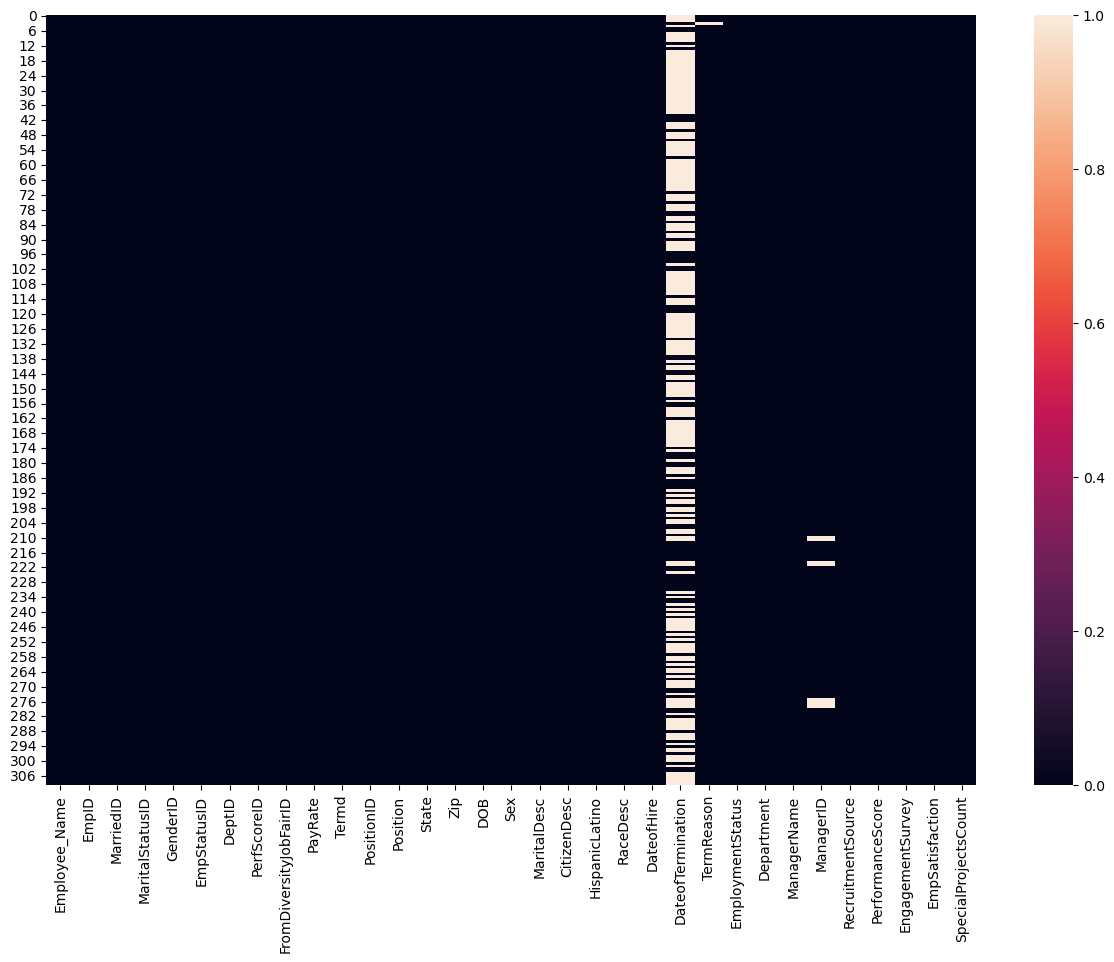

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(hr_data.isnull())
plt.show()

In [11]:
## Zadanie nr 1

In [12]:
#### Wyświetlamy 2 countploty i sprawdzamy ile jest ocen i ilu managerów, jak dane sie rozkładają 

<Axes: xlabel='PerformanceScore', ylabel='count'>

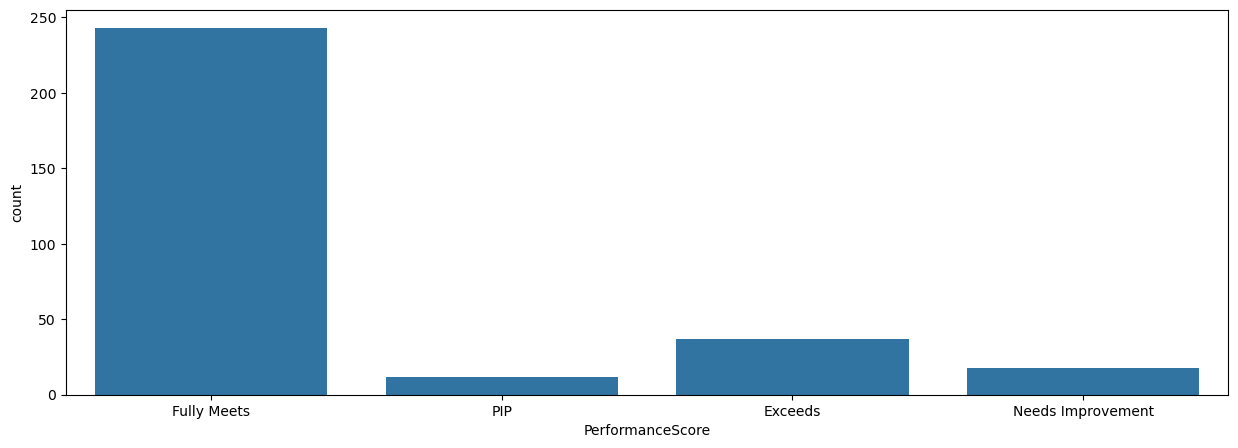

In [13]:
plt.figure(figsize=(15,5))
sns.countplot(x='PerformanceScore',data=hr_data)

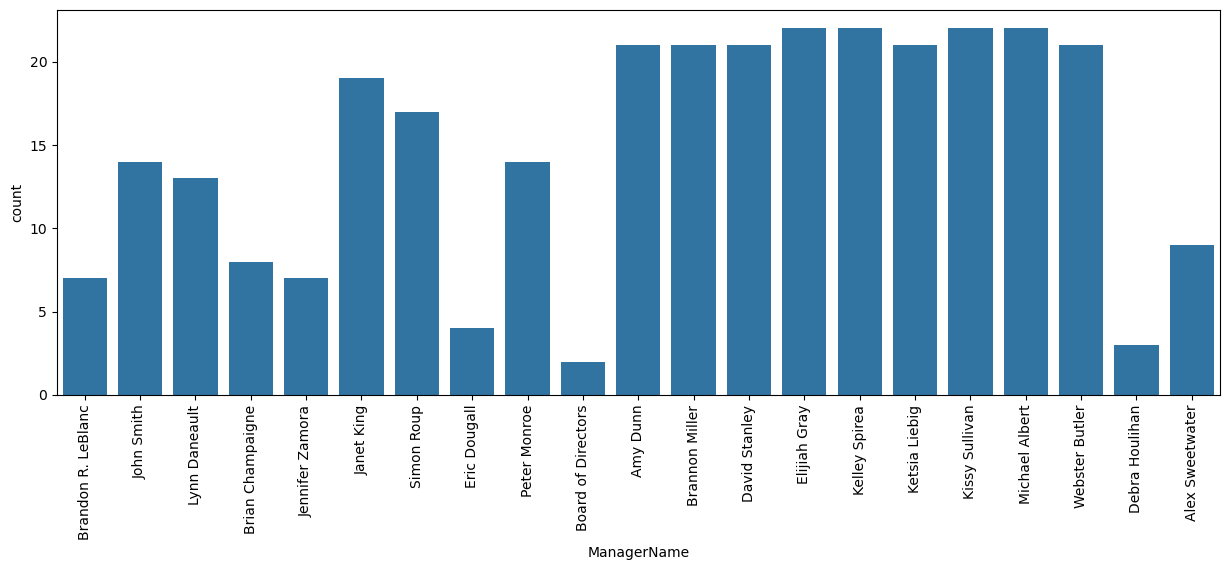

In [14]:
plt.figure(figsize=(15,5))
b= sns.countplot(x='ManagerName',data=hr_data)
plt.setp(b.get_xticklabels(), rotation=90)
plt.show()

#### Łączymy ze sobą dwa poprzednie ploty, niestety, oceny są tylko w 4 kategoriach, więc ten wykres nie pomoże zbytnio w odpowiedzi na pytanie

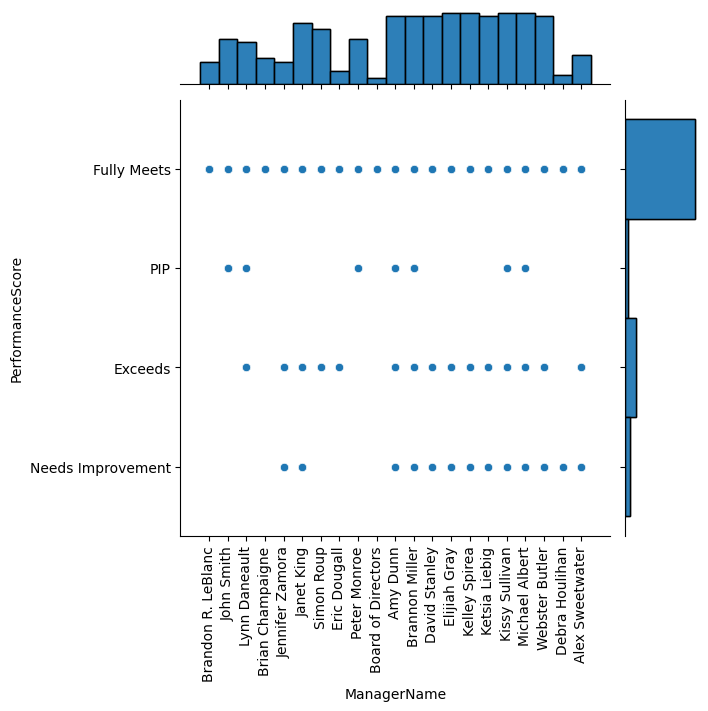

In [16]:
b = sns.jointplot(x='ManagerName',y='PerformanceScore',data=hr_data,hue_order=90)
b.plot(sns.scatterplot, sns.histplot)
b.ax_joint.tick_params(axis="x", rotation=90)
plt.show()

#### Gdy dla naszych danych stworzymy boxplot i zestawimy go z poprzednim wykresem widać że niektórzy mamagerowie, którzy mieli duża liczbę przeprowadzonych ocen jak np Kelley, Ketsia, czy Kissy ich boxploty zawierają się w ocenie Fully Meets, i tylko nieliczne oceny mają wynik Exceed lub Needs of improvement.Natomiast managerowie tacy jak Brannon Miller czy Amy mają porównywaną liczę ocen ale boxplot ich ocen jest szerszy i są skłonni częściej wystawiać oceny PIP lub Exceeds. 

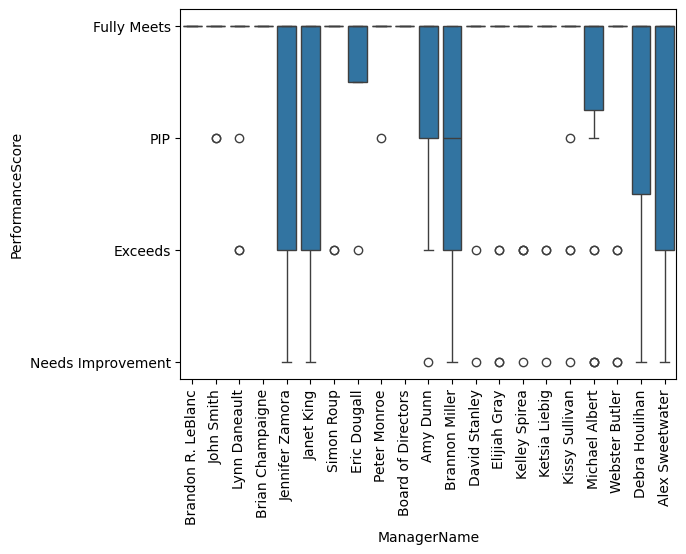

In [18]:
b= sns.boxplot(x='ManagerName',y='PerformanceScore',data=hr_data)
plt.setp(b.get_xticklabels(), rotation=90)
plt.show()

In [19]:
managers_performance_review = hr_data[['ManagerName','PerformanceScore']].pivot_table(index = 'ManagerName',columns='PerformanceScore', aggfunc=len )
managers_performance_review
managers_performance_review['Managers']= managers_performance_review.index

In [20]:
pd.crosstab(hr_data['ManagerName'],hr_data['PerformanceScore']).head()

PerformanceScore,Exceeds,Fully Meets,Needs Improvement,PIP
ManagerName,,,,
Alex Sweetwater,2,6,1,0
Amy Dunn,3,15,1,2
Board of Directors,0,2,0,0
Brandon R. LeBlanc,0,7,0,0
Brannon Miller,7,9,1,4


#### Jeśli dla ocen managerów zrobimy Heatmap to widać na niej że Brannon Miller częściej niż pozostali wystawia oceny Exceed ale również widać u niego że pracuje najmocniej nad planami usprawnień PIP. Widać również że w zespole Michaela jest nawiększa liczba osób które mają ocenę Need of improvement. W zespołąch u dla których ocena jest wystawiana przez Board of Directors, Brandon R, Brian, Eric D. widać że oceny są jednolite i wszyscy spełniają wymagania, nikt z nich nie wyprzedza wymagań ani nie potrzebuje pomocy w usprawnieniach. Zależności pomiedzy tym kto jest managerem a oceną wydajności pracy najlepiej widoczne są na tej HeatMapie. 

<Axes: xlabel='PerformanceScore', ylabel='ManagerName'>

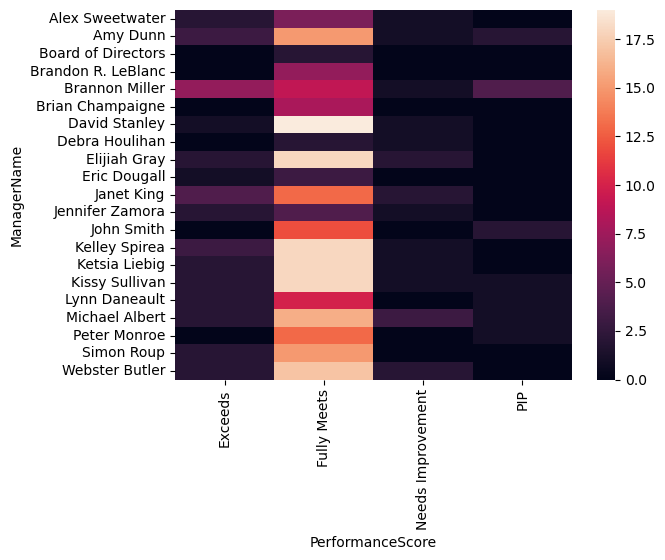

In [22]:
managers_performance_review = hr_data[['ManagerName','PerformanceScore']]
managers_performance_review= pd.crosstab(hr_data['ManagerName'],hr_data['PerformanceScore'])
sns.heatmap(managers_performance_review)

## Zadanie nr 2 

#### Dane do analizy są pobierane i obliczana jest długość stażu każdego pracownika, czyu to aktualnie pracującego czy tego który już nie pracuje w firmie

In [25]:
hr_data_updated = hr_data

In [26]:
def count_seniority(row):
    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019,9,27)
    else:
        end_date = row['DateofTermination']
    return (end_date - row['DateofHire'])/np.timedelta64(365,'D')

In [27]:
hr_data_updated['DOB'] = pd.to_datetime(hr_data_updated['DOB'],format='%m/%d/%y')
hr_data_updated['DateofTermination'] = pd.to_datetime(hr_data_updated['DateofTermination'],format='%m/%d/%y')
hr_data_updated['DateofHire'] = pd.to_datetime(hr_data_updated['DateofHire'],format='%m/%d/%Y')

In [28]:
hr_data_updated['Seniority'] = hr_data_updated.apply(lambda row: count_seniority(row),axis=1)
hr_data_updated[['Seniority','RecruitmentSource']].head()

,Seniority,RecruitmentSource
0,10.923288,Diversity Job Fair
1,5.726027,Website Banner Ads
2,4.997260,Internet Search
3,0.158904,Pay Per Click - Google
4,4.410959,Website Banner Ads


#### Konstruowane są 2 boxploty by zobaczyć jaka ilość firm prowadzi rekrutacje oraz jak wygląda histogram stażu pracy

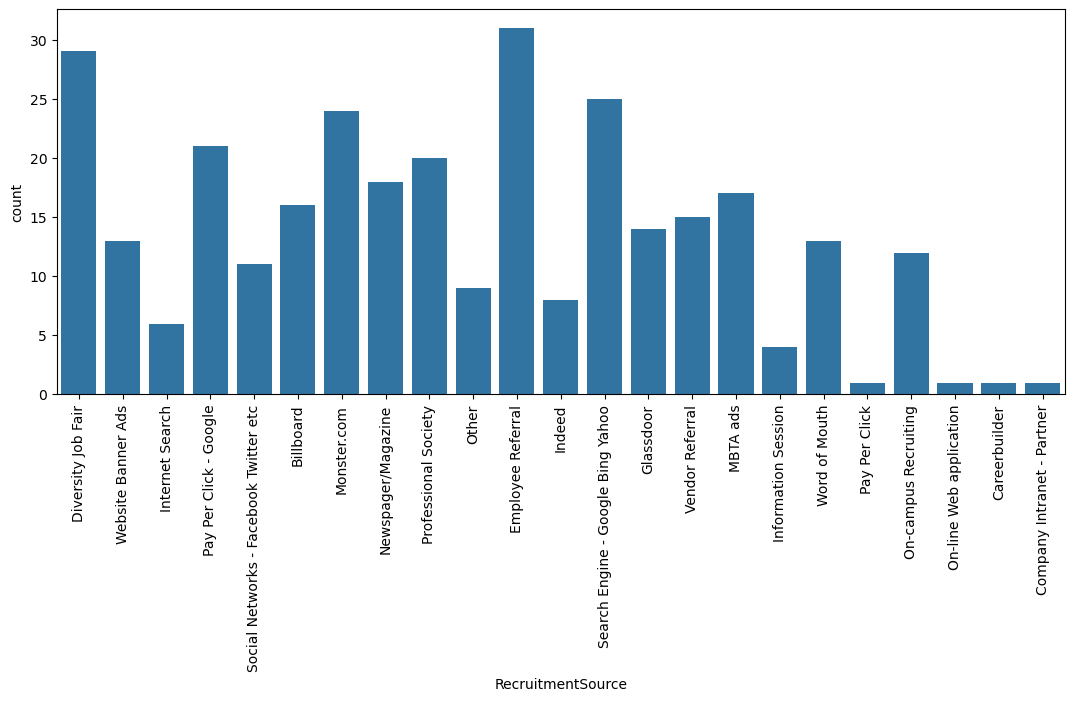

In [30]:
plt.figure(figsize=(13,5))
b= sns.countplot(x='RecruitmentSource',data=hr_data_updated)
plt.setp(b.get_xticklabels(), rotation=90)
plt.show()

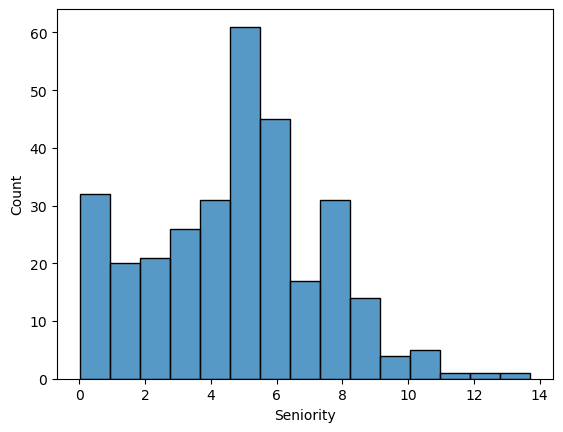

In [31]:
sns.histplot(data=hr_data_updated, x='Seniority')
plt.show()

#### Można połączyć ze sobą oba wykresy i dzięki ntemu uzyskać pierwsze wrażenie jak oba zestawy informacji są ze sobą powiązane. 

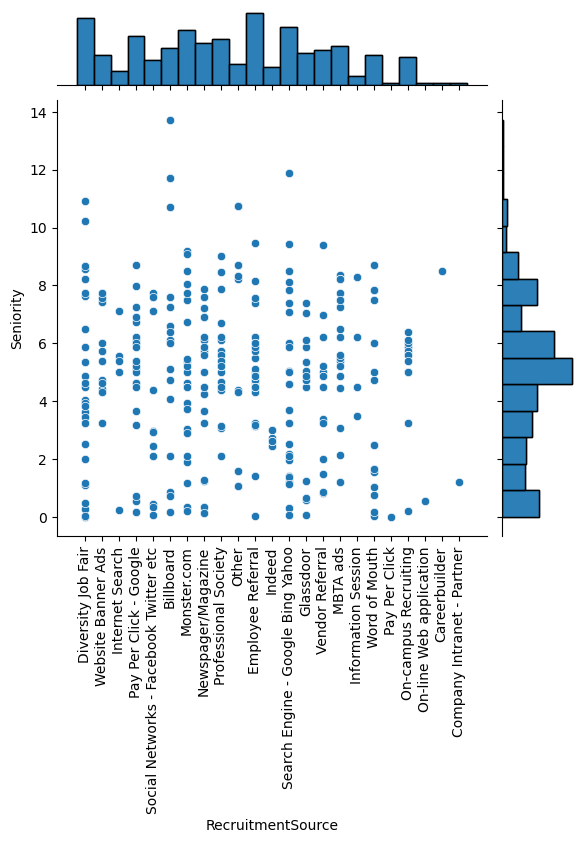

In [33]:
b= sns.jointplot(x='RecruitmentSource',y='Seniority',data=hr_data_updated)
b.plot(sns.scatterplot, sns.histplot)
b.ax_joint.tick_params(axis="x", rotation=90)
plt.show()

#### Boxplot jest tutaj bardzo przydanty do oceny które źródła są nalepsze do pozyskania pracowników jeśli zależy nam na długim stażu. Źródło Other jest dość wyróżniającym się sposobem pozyskiwania pracowników, ponieważ charakteryzuje się najwyższą medianą ze wszystkich źródeł i również przedział Q1-Q3 na tle pozostałych źródeł sugeruje długi czas zatrudnienia w firmie. Firmy jak Word i network czy Indeed mają najniższa medianę co oznacza że 50% osób zatrudnionych za ich pośrednictwem odchodzi najszybciej z firmy. Word i network zdają się być najgorszymi firmami pod względem najdłuzszego stażu pracownika, gdyż co prawda Indeed ma porówywalną medianę ale ma też bardzo wąski przeciał Q1-Q4 co sprawia że firma ta jest znacząco lepszą od 2 poprzednich.  Co prawda firmy takie jak Pay Per, Online web czy czompany intranet, mają niższą "medianę" ale są to pojedyńcze osoby zatrudnione za ich pośrednictwem więc jest to za mała próbka by moć ocenić te firmy.   Natomiast w przypadku Indeed z duża dozą prawdopodobieństwa można przewidzieć kiedy pracownik odejdzie. Firmy takie jak Billboard i Serch engine zatrudniają pracowników którzy pozostają najdłużej, natomiast Bilboard ma znacznie wyższa medianę więc 50% pracowników zatrudnionych za ich pośrednictwem zostaaje od 6 do 12 lat w zakłądzie i jest to bardzo dobry wynik. 

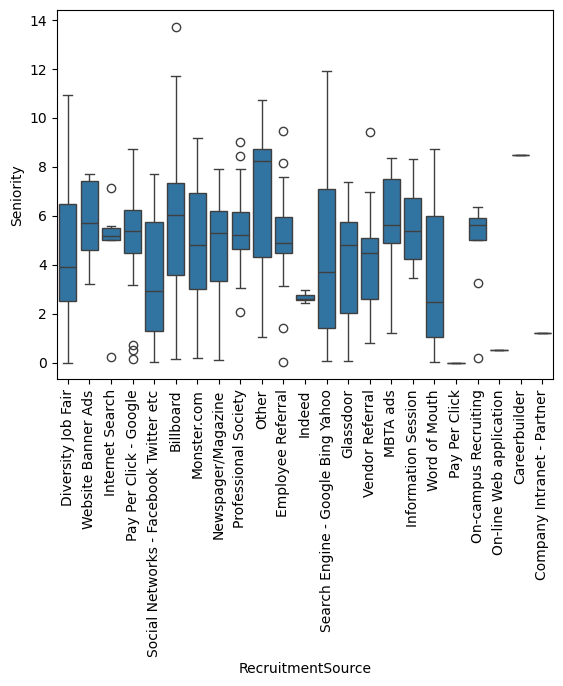

In [35]:
b= sns.boxplot(x='RecruitmentSource',y='Seniority',data=hr_data_updated)
plt.setp(b.get_xticklabels(), rotation=90)
plt.show()

#### Przygotowana HeatMap tylko potwierdza powyzsze obserwacje. 

<Axes: xlabel='RecruitmentSource', ylabel='Seniority'>

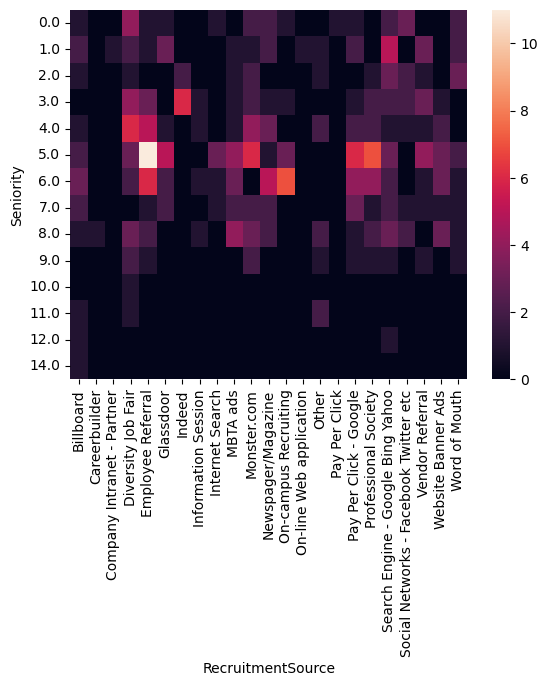

In [37]:
heat_map_data= pd.crosstab(hr_data_updated['Seniority'].round(0),hr_data_updated['RecruitmentSource'])
heat_map_data
sns.heatmap(heat_map_data)

## Zadanie nr 3 

#### Wyświetlamy 2 wykresy żeby zrozumieć strukturę danych i zaobaczyć które kategorie mają najwiecej wpisów. 

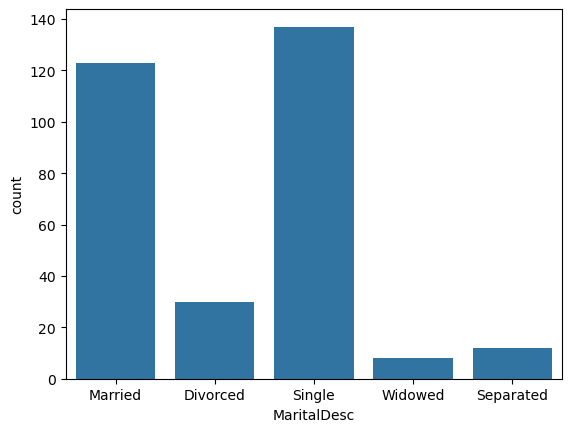

In [40]:
sns.countplot(x='MaritalDesc',data=hr_data)
plt.show()

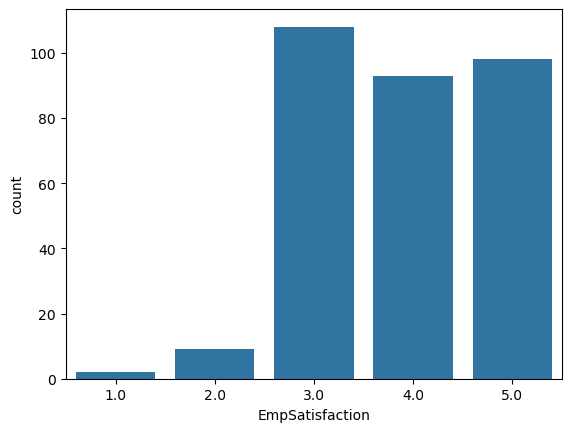

In [41]:
sns.countplot(x='EmpSatisfaction',data=hr_data)
plt.show()

#### Najnizszą satysfakcję z pracy mają osoby które są w separacji lub są singlami. Aż ok 25% z nich ocenia zadowolenie z pracy pomiędzy 1 a 3. Drugą grupą która ma najmniej satyfakcji z pacy są ludzie mający małżonka. ok 25% z nich oceniło zadowolenie z pracy na 2 lub 3. Grupa która jest najbardziej usatysfakcjonowana z pracy to osoby rozwiedzine gdyż ok 50% z nich zaznaczyło ocenę 5. 

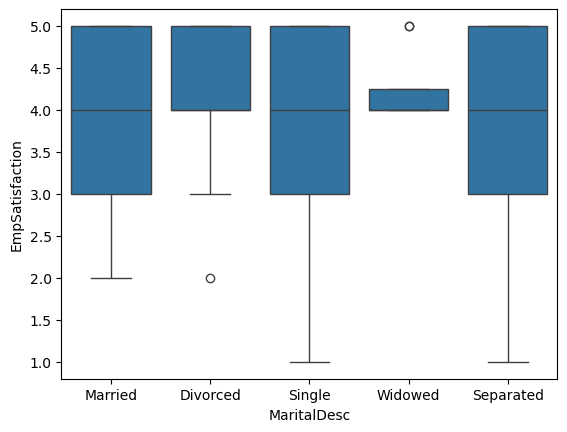

In [43]:
sns.boxplot(x='MaritalDesc',y='EmpSatisfaction',data=hr_data)
plt.show()

#### Przygotowana HeatMap tylko potwierdza powyzsze obserwacje. 

<Axes: xlabel='MaritalDesc', ylabel='EmpSatisfaction'>

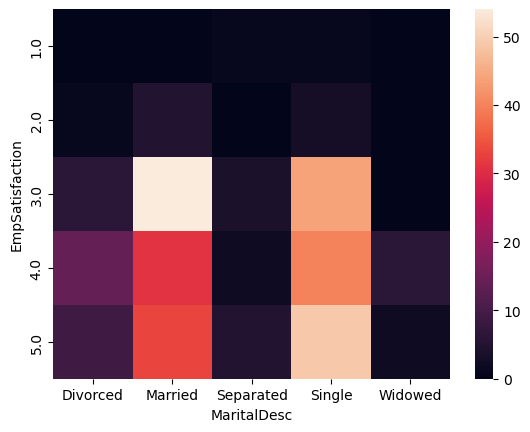

In [45]:
heat_map_data= pd.crosstab(hr_data['EmpSatisfaction'],hr_data['MaritalDesc'])
sns.heatmap(heat_map_data)

## Zadanie nr 4

#### Pobieramy dane, czyścimy z osób które już nie pracują i obliczamy wiek pracownika w latach na dzień  2019,9,27

In [48]:
actual_employe = hr_data_updated[['DOB','DateofTermination','SpecialProjectsCount']]
actual_employe = actual_employe.loc[actual_employe['DateofTermination'].isnull()]
actual_employe.drop(['DateofTermination'],axis=1,inplace=True)

In [49]:
def years_no(x):
    end_date = dt.datetime(2019,9,27)
    return (end_date - x['DOB'])/np.timedelta64(365,'D')

In [50]:
actual_employe['age_of_employee'] = actual_employe.apply(lambda x: years_no(x),axis=1)

#### Tworzymy histogram. Obserwujemy anomalie w postaci ujemnego wieku. To znaczy że data urodzenia w bazie została podana po 2019,9,27. W taki wypadku należy się skontaktować z właścicielem bazy danych i wyjaśnić takie wpisy. Zakładając że są błedne usuniemy je z bazy i bedziemy kontynuować analizę bez nich. 

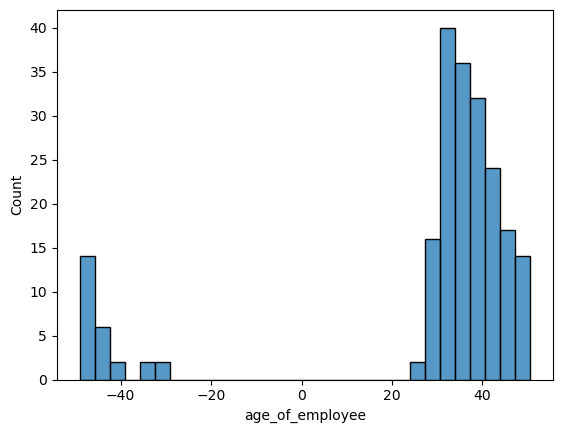

In [52]:
sns.histplot(data=actual_employe, x='age_of_employee')
plt.show()

#### Ponizszy histogram obrazuje strukturę wieku aktualnie zatrudnionych pracowników bez uwzdlędnienia usuniętych wpisów 

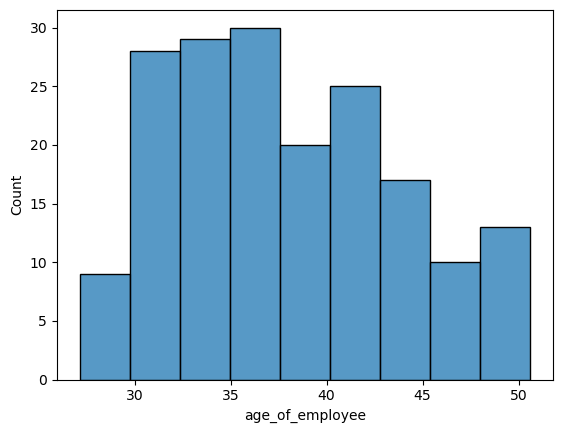

In [54]:
actual_employe= actual_employe[(actual_employe['age_of_employee']>0)]
sns.histplot(data=actual_employe, x='age_of_employee')
plt.show()

In [55]:
## Zadanie nr 5

In [56]:
actual_employe.drop(['DOB'],axis=1,inplace=True)

#### wyświetlamy countplot by zrozumieć jak wyglada struktura danych pod względem ilości specjalnych projektów na osobę

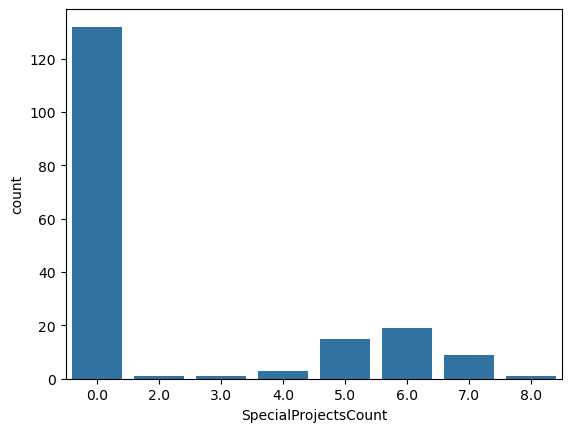

In [58]:
sns.countplot(x='SpecialProjectsCount',data=actual_employe)
plt.show()

#### wyświetlamy jointplot który da nam wstępną ocenę zależności pomiedzy wiekiem a ilością soecjalnych projektów. Obserwujemy większą ilość punktów dla osób pomiedzy ok 30-40 rokiem zycia niż dla osób pomiedzy ok 40 a 60 rokiem życia

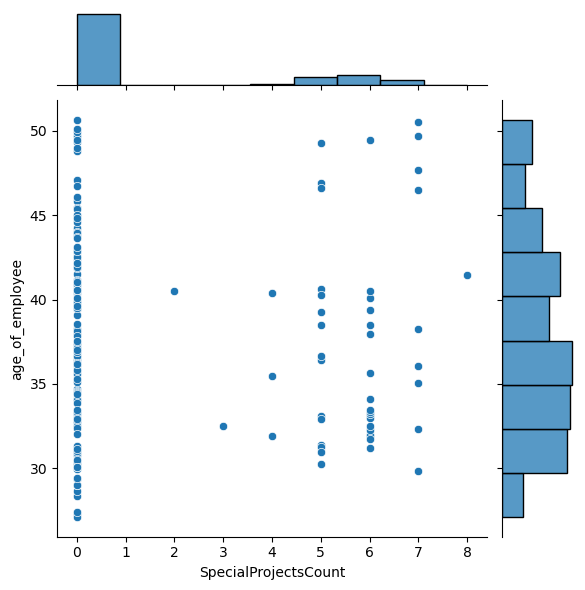

In [60]:
sns.jointplot(x='SpecialProjectsCount',y='age_of_employee',data=actual_employe)

#### Wyświetlamy boxplot dla naszych danych

<Axes: xlabel='SpecialProjectsCount', ylabel='age_of_employee'>

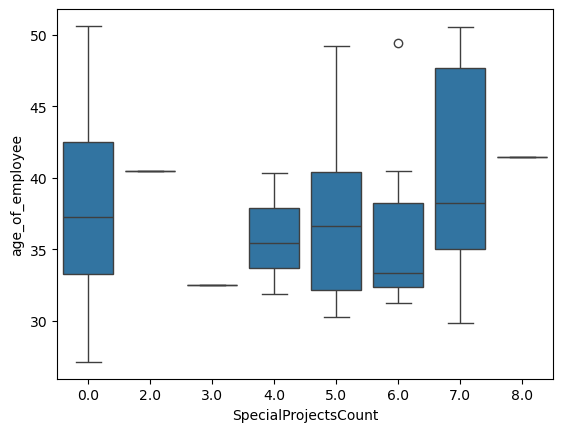

In [62]:
sns.boxplot(x='SpecialProjectsCount',y='age_of_employee',data=actual_employe)

#### Wyswitlamy heatmap dla naszych danyc. Z boxplot oraz na Heatmap możemy wysnuć wniosek że nad większa ilością projektów specjanych pracują osoby pomiedzy 30 a 41 rokiem życia niż osobypomiędzy 42 a 51 rokiem życia. warto też zaznaczyć że w obu grupach jest porównywalnie dużo osób które pracują nad 7 specjalnymi projektami na raz.  

<Axes: xlabel='age_of_employee', ylabel='SpecialProjectsCount'>

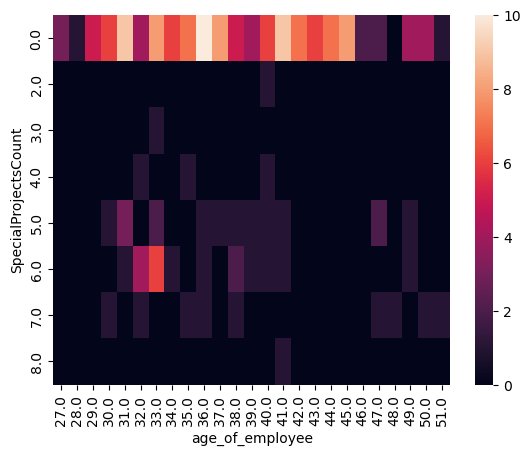

In [64]:
heat_map_data= pd.crosstab(actual_employe['SpecialProjectsCount'],actual_employe['age_of_employee'].round(0))
sns.heatmap(heat_map_data)